In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
from tensorflow.keras.preprocessing import sequence

In [18]:
max_features = 10000 #최대 단어의 개수
maxlen = 200 #최대 단어 길이 (인풋으로 한번에 넣을 수 있는 단어의 수)

In [19]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features, skip_top=0)
# num_word : 빈도가 높은 상위 max_features개 단어만 사용함.
# skip_top : 빈도가 높은 상위 단어 0개 제외

In [20]:
X_train = sequence.pad_sequences(input_train, maxlen=maxlen) # sequence.pad_sequences : maxlen보다 작으면 앞을 0으로 채우고, maxlen보다 크면 앞을 자른다.

In [21]:
X_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(X_train.max())

(25000, 200)
(25000, 200)
9999


In [25]:
print(input_train[1])
print(X_train[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
[   0    0    0    0    0    0    0    0    0    0    0    1  194 1153
  194 8255   78  228    5    6 1463 4369 5012  134   26    4  715    8
  118 1634   14  394   20 

In [26]:
 model = tf.keras.Sequential()

model.add(layers.Enbedding(max_features, 32))

In [28]:
model.add(layers.LSTM(32))

model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [33]:
hist = model.fit(X_train, y_train, 
                   epochs=10,
                   batch_size=128,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
                   validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 200)


In [35]:
model = tf.keras.Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(X_train, y_train, 
                   epochs=10,
                   batch_size=128,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 76ms/step - loss: 0.5923 - acc: 0.6904 - val_loss: 0.4040 - val_acc: 0.8424
Epoch 2/10
157/157 [==============================] - 12s 75ms/step - loss: 0.2998 - acc: 0.8806 - val_loss: 0.3017 - val_acc: 0.8804
Epoch 3/10
157/157 [==============================] - 12s 75ms/step - loss: 0.2258 - acc: 0.9162 - val_loss: 0.2825 - val_acc: 0.8830
Epoch 4/10
157/157 [==============================] - 12s 76ms/step - loss: 0.1928 - acc: 0.9288 - val_loss: 0.2956 - val_acc: 0.8722
Epoch 5/10
157/157 [==============================] - 12s 76ms/step - loss: 0.1622 - acc: 0.9449 - val_loss: 0.3137 - val_acc: 0.8822
Epoch 6/10
157/157 [==============================] - 12s 75ms/step - loss: 0.1497 - acc: 0.9460 - val_loss: 0.3110 - val_acc: 0.8828


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


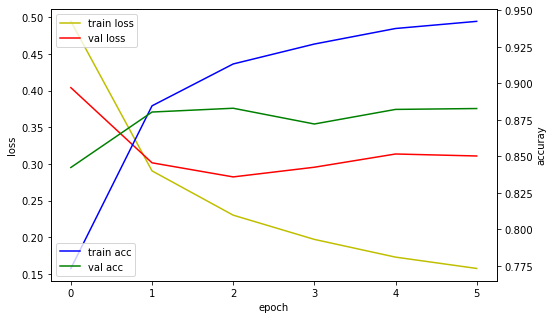

In [37]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

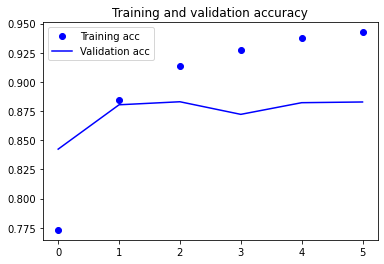

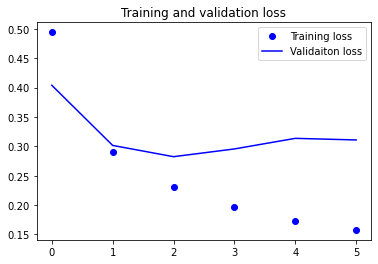

In [38]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs = range(len(acc)))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaiton loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [39]:
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])
test_loss:  0.35294207727432253
test_acc:  0.86456

782/782 [==============================] - 8s 10ms/step - loss: 0.3513 - acc: 0.8622
test_loss:  0.35132917761802673
test_acc:  0.8622400164604187
